# Região de Estabilidade do Método Explícito do Ponto Médio (Euler modificado)

O método do Ponto Médio é dado pela fórmula: 
    $$
        \begin{align*}
        k_1 &= f(t_n, u_n)\\
        k_2 &= f\left(t_n + \frac{h}{2}, \ u_n + \frac{h}{2} k_1 \right) \\
        u_{n+1} &= u_{n} + h (k_2) 
        \end{align*}
    $$
    
agora fazemos a substituição pela equação de teste de Dahlquist. Primeiro vamos substitui-la nos coeficientes $k_1$ e $k_2$ de forma individual.
    
Para o $k_1$, temos:
    $$
    \begin{align*}
        k_1 = f(t_n, u_n) = \lambda u_n
    \end{align*}
    $$

e para o $k_2$: 
    $$
    \begin{align*}
        k_2 &= f(t_n + \frac{h}{2}, \ u_n + \frac{h}{2}k1) \\
        k_2 &= f\left(t_n + \frac{h}{2}, \ u_n + \frac{h}{2}\lambda u_n\right) \\
        k_2 &= \lambda \cdot \left( u_n + \frac{h \lambda}{2} u_n\right)
    \end{align*}
    $$

fatorando em função de $u_n$, obtemos: 
    $$
    \begin{align*}
        k_2 &= \lambda u_n \cdot \left( 1 + \frac{h \lambda}{2}\right)
    \end{align*}
    $$
e assumindo o valor de $z$ pela definição da Região de Estabilidade, temos:
    $$
    \begin{align*}
        k_2 &= \lambda u_n \cdot \left( 1 + \frac{z}{2}\right)
    \end{align*}
    $$
encontramos os dois coeficientes da fórmula, basta apenas substitui-los:
    $$
    \begin{align*}
        u_{n+1} &= u_{n} + h (k_2) \\
        u_{n+1} &= u_{n} + h \left(\lambda u_n (1 + \frac{z}{2}\right) \\ 
    \end{align*}
    $$
fatorando $\lambda u_n$:
    $$
    \begin{align*}
        u_{n+1} &= u_{n} + h \lambda \ u_n  \left(1  + 1 + \frac{z}{2}\right) \\ 
        u_{n+1} &= u_{n} + z u_n  \left(1 + \frac{z}{2} \right) \\ 
    \end{align*}
    $$
agora podemos aplicar $R(z) = \frac{u_{n+1}}{u_n}$ e obter a região: 
    $$
    \begin{align*}
        R(z) &= 1 + z + \frac{z^2}{2}
    \end{align*}
    $$

Para encontrar suas coordenadas, vamos substituir $z = x + yi$
    $$
    \begin{align*}
        \left|1 + (x+yi) + \frac{(x+yi) ^2}{2}\right| &\le 1
    \end{align*}
    $$

retirando o módulo e aplicando a raiz quadrada
    $$
    \begin{align*}
    \sqrt{\left(1 + x + \frac{x ^2 - y^2}{2}\right)^2+ i\left(y + xy\right)^2} &\le 1
    \end{align*}
    $$

elevando ambos os lados ao quadrado:
    $$
    \begin{align*}
    \left(1 + x + \frac{x ^2 - y^2}{2}\right)^2+ \left(y + xy\right)^2 &\le 1^2
    \end{align*}
    $$

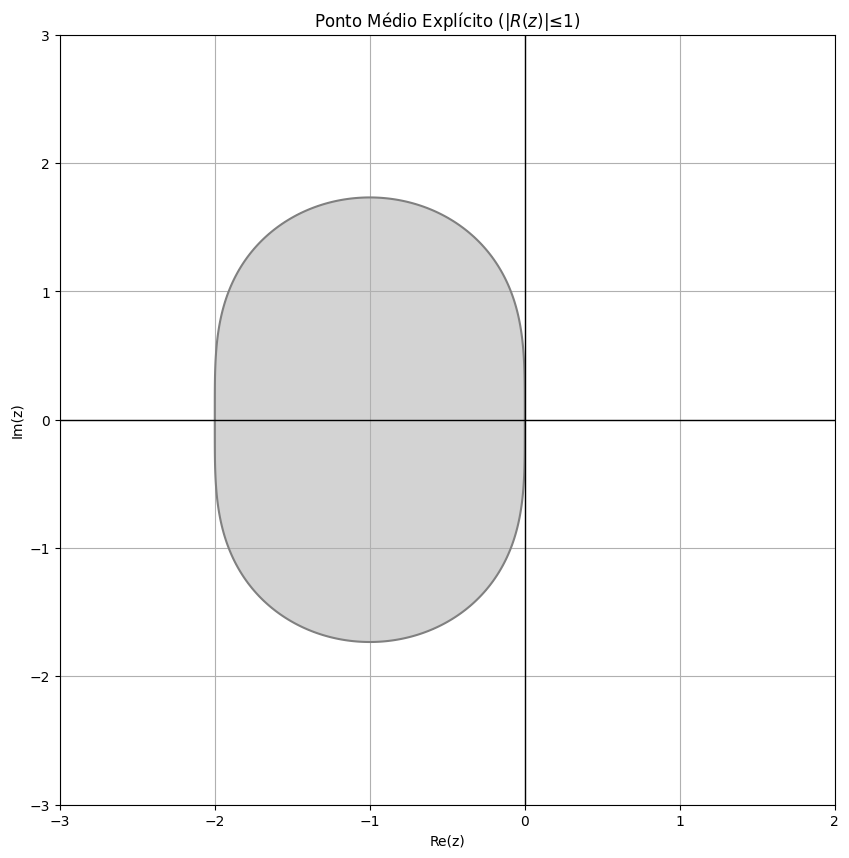

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

x = np.linspace(-3.0, 2.0, 400)
y = np.linspace(3.0, -3.0, 400)
xx, yy = np.meshgrid(x,y)
z = xx + 1j*yy

def Midpoint(z):
    return 1 + z + (z**2) / 2

RE_MP = np.abs(Midpoint(z))

plt.figure(figsize=(10,10))
plt.title('Ponto Médio Explícito ($|R(z)| ≤ 1$)')
plt.contourf(xx, yy, RE_MP, levels=[0,1], colors='lightgray')
plt.contour(xx, yy, RE_MP, levels=[1], colors="gray")
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.grid(True)
plt.axhline(0, color='black', lw=1, zorder=2) 
plt.axvline(0, color='black', lw=1, zorder=2)